## Deep Learning from Ground Up

In this notebook, we are working our way up from Linear Regression, all the way to Deep Learning.

In [1]:
## first the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## some widgets to make the notebook more interactive
from ipywidgets import interact, FloatSlider

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

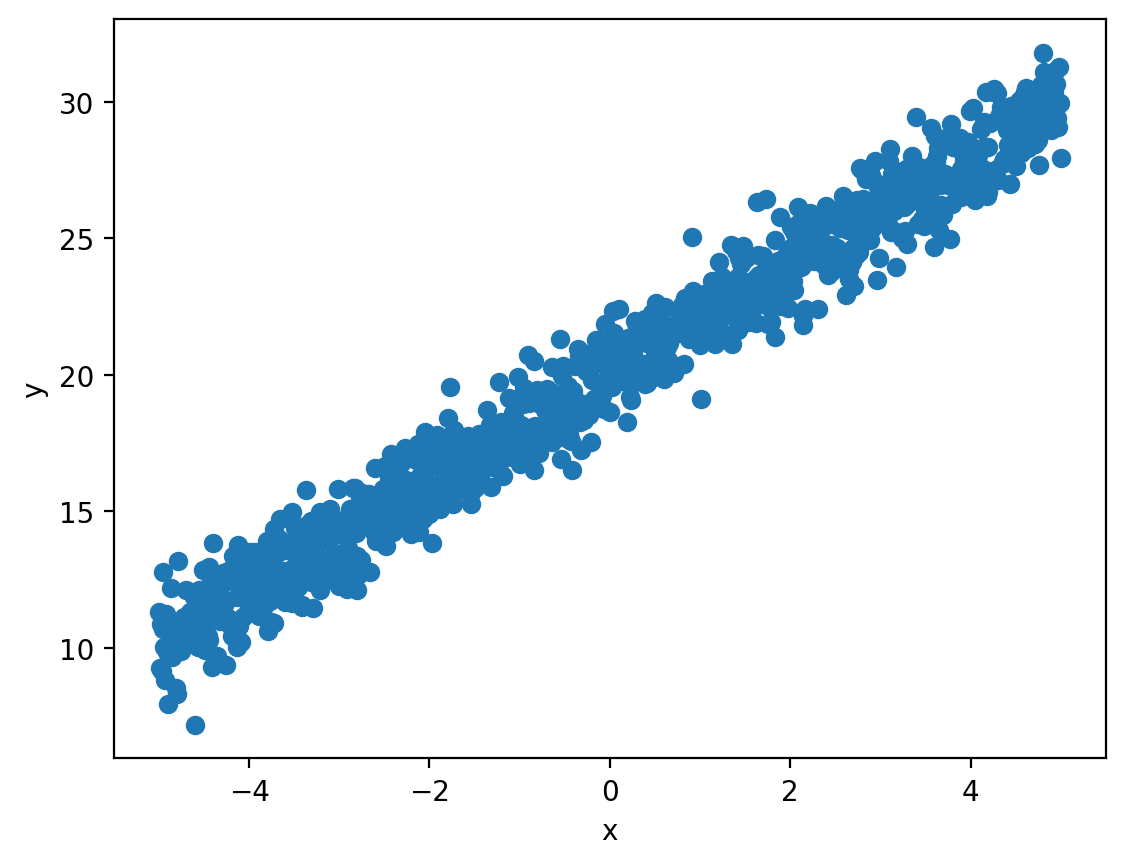

In [2]:
## creating some random data
n = 1000
w_true = 2
b_true = 20
x = np.linspace(-5, 5, n)
## creating a normally distributed noise
noise_fn = lambda x:np.random.normal(size = (x))

y = w_true * x + b_true + noise_fn(n)

## plotting our random data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

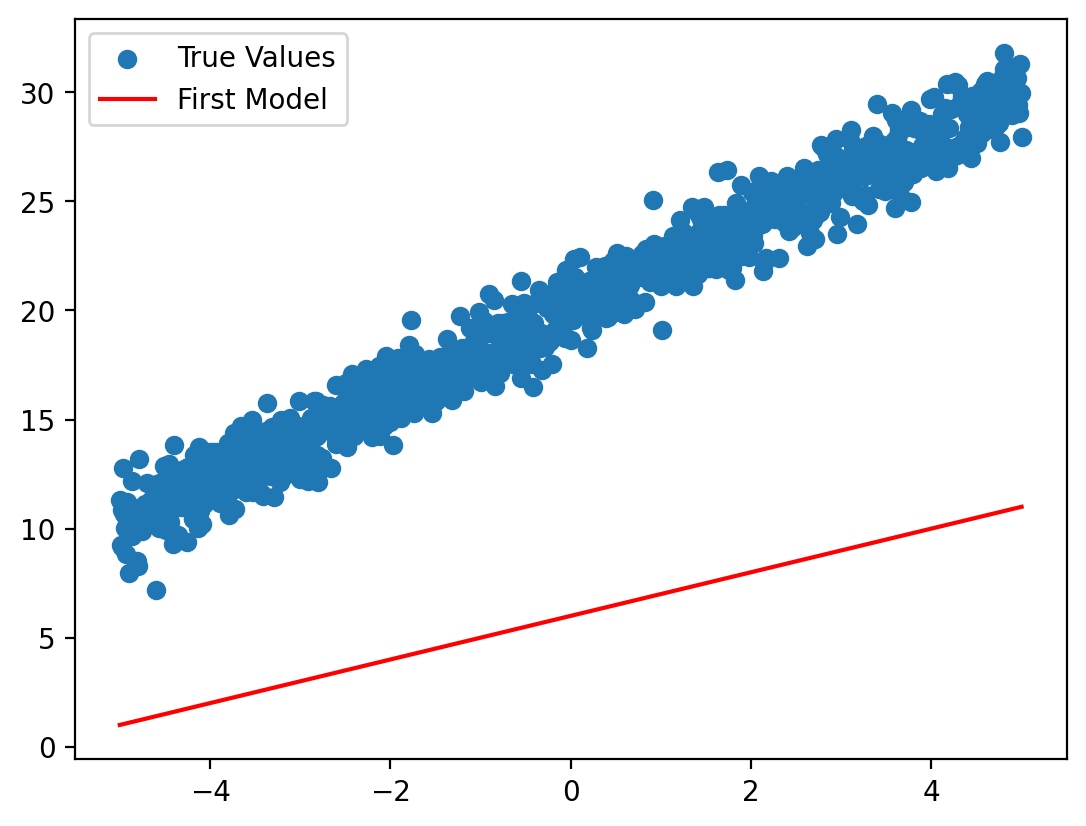

In [3]:
## starting with some bad first guesses
w = np.random.randint(0, 10)
b = np.random.randint(0, 10)
yhat = w * x + b
plt.scatter(x, y, label='True Values')
plt.plot(x, yhat, label='First Model', color='r')
plt.legend();

### Loss Function

In [4]:
## we will be using MSE as our loss function
def mse(y_pred, y_true):
    return np.mean((y_true - y_pred)**2)
## and now we can calculate the current model's loss
mse(yhat, y)

206.28273668748255

interactive(children=(FloatSlider(value=0.0, description='w', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

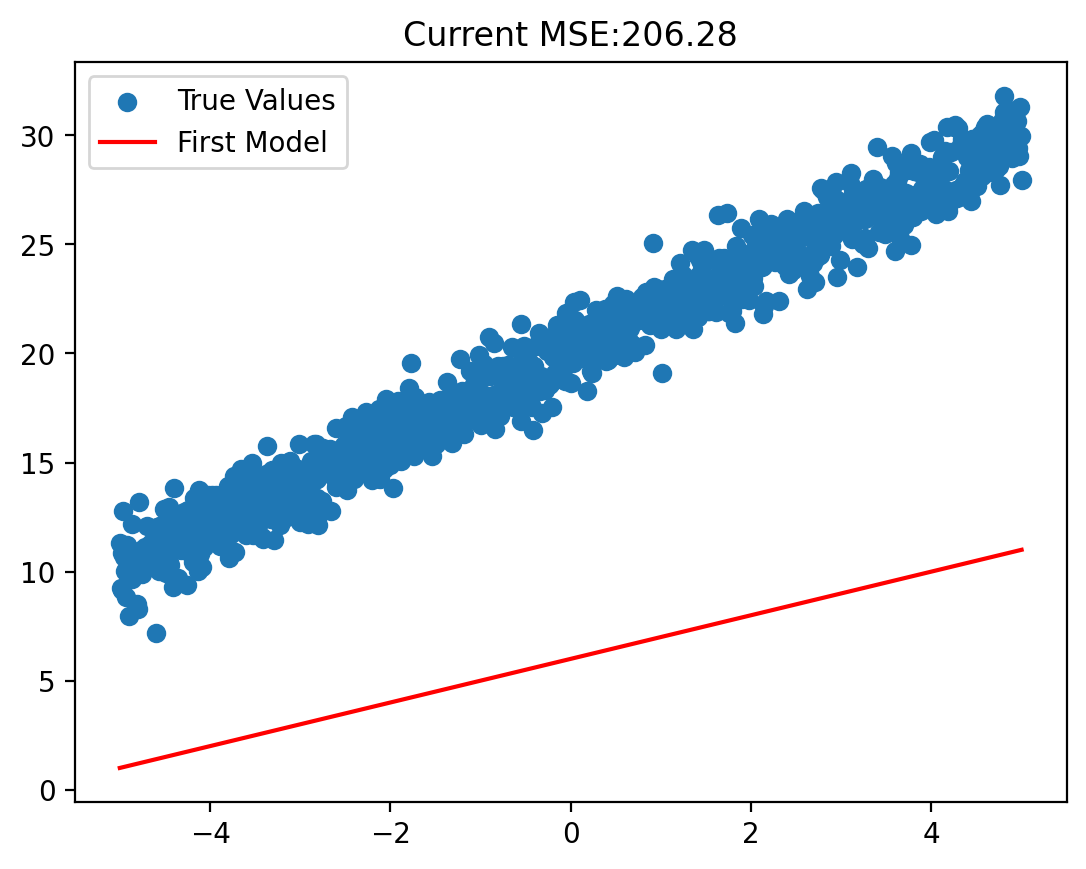

In [7]:
## manually changing the weight and bias
@interact(
    w = FloatSlider(min = -10, max = 10, step = .1),
    b = FloatSlider(min = -10, max = 10, step = .1)
)
def optimize_plot(w, b):
    yhat = w * x + b
    plt.scatter(x, y, label='True Values')
    plt.plot(x, yhat, label='First Model', color='r')
    plt.legend()
    plt.title(f'Current MSE:{mse(yhat, y):.2f}')
optimize_plot(w, b)

### Optimization

In order to optimize our loss, we have to get the derivatives of the function with respect to each of its variables.

In [16]:
## toy optimization problem
## that we can simply calculate the min by hand
def f(w):
    return w ** 2 + 3 * w - 5 
def df(w):
    return 2 * w + 3
## random start 
w = 10
## loop through to calculate the new value
for _ in range(1000):
    w = w - df(w) * 0.01
## the calculated min 
print(f'{w:.3}')

-1.5


In [11]:
## we will be using this library called jax
## which will enable us to automatically defferentiate 
## any arbitrary function in numpy
import jax.numpy as jnp

## and now all we have to do is to re-write all of our functions in np
n = 1000
w_true = jnp.pi
b_true = jnp.pi * 2
x = jnp.linspace(-5, 5, n)
def y_fn(x, w, b):
    return w * x + b + jnp.random.normal(size = len(x))
def mse(yhat, ytrue):
    return jnp.mean((ytrue - yhat)**2)

